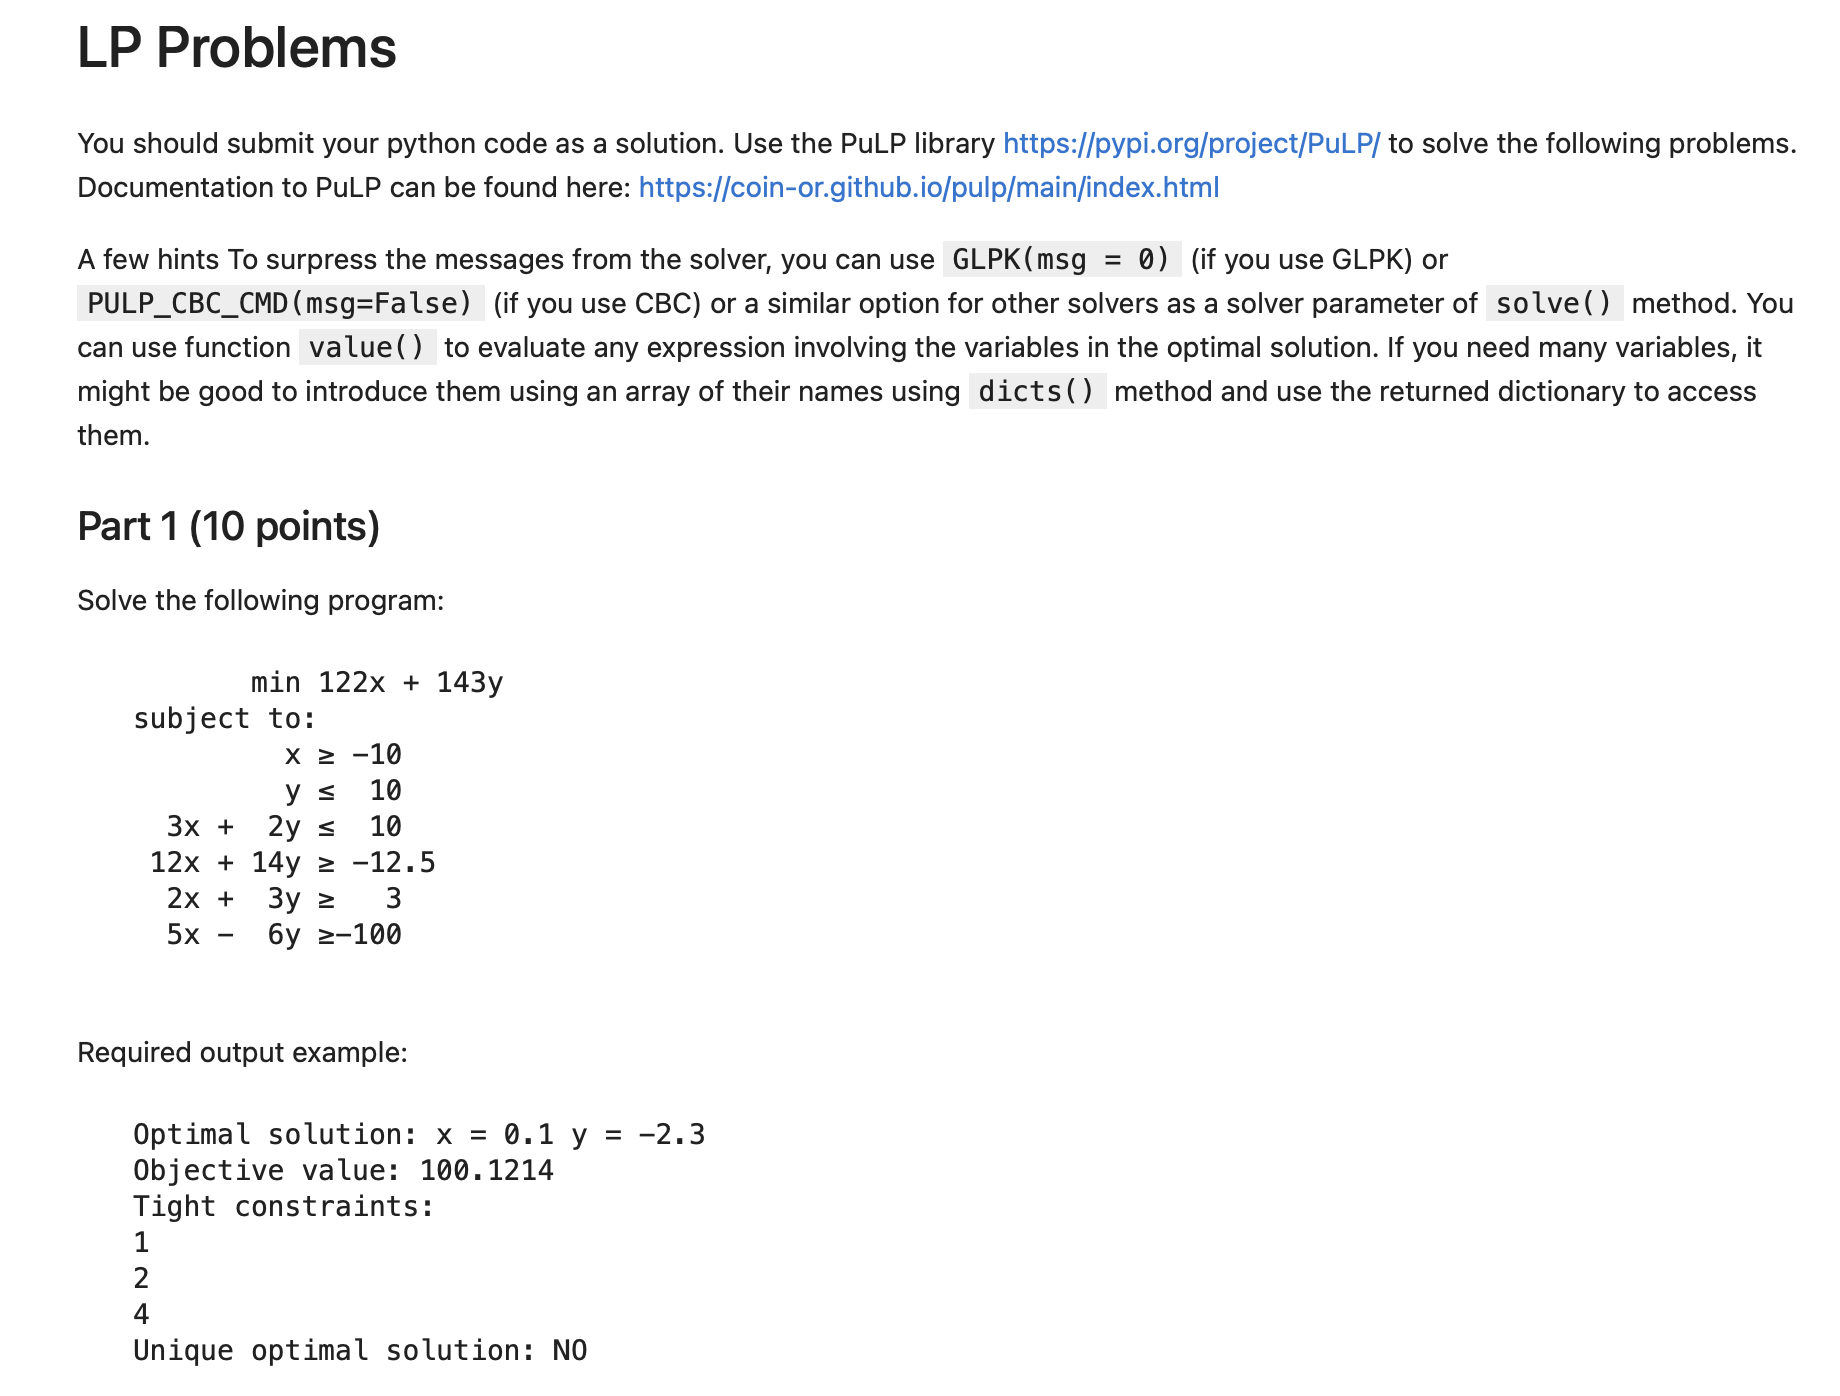

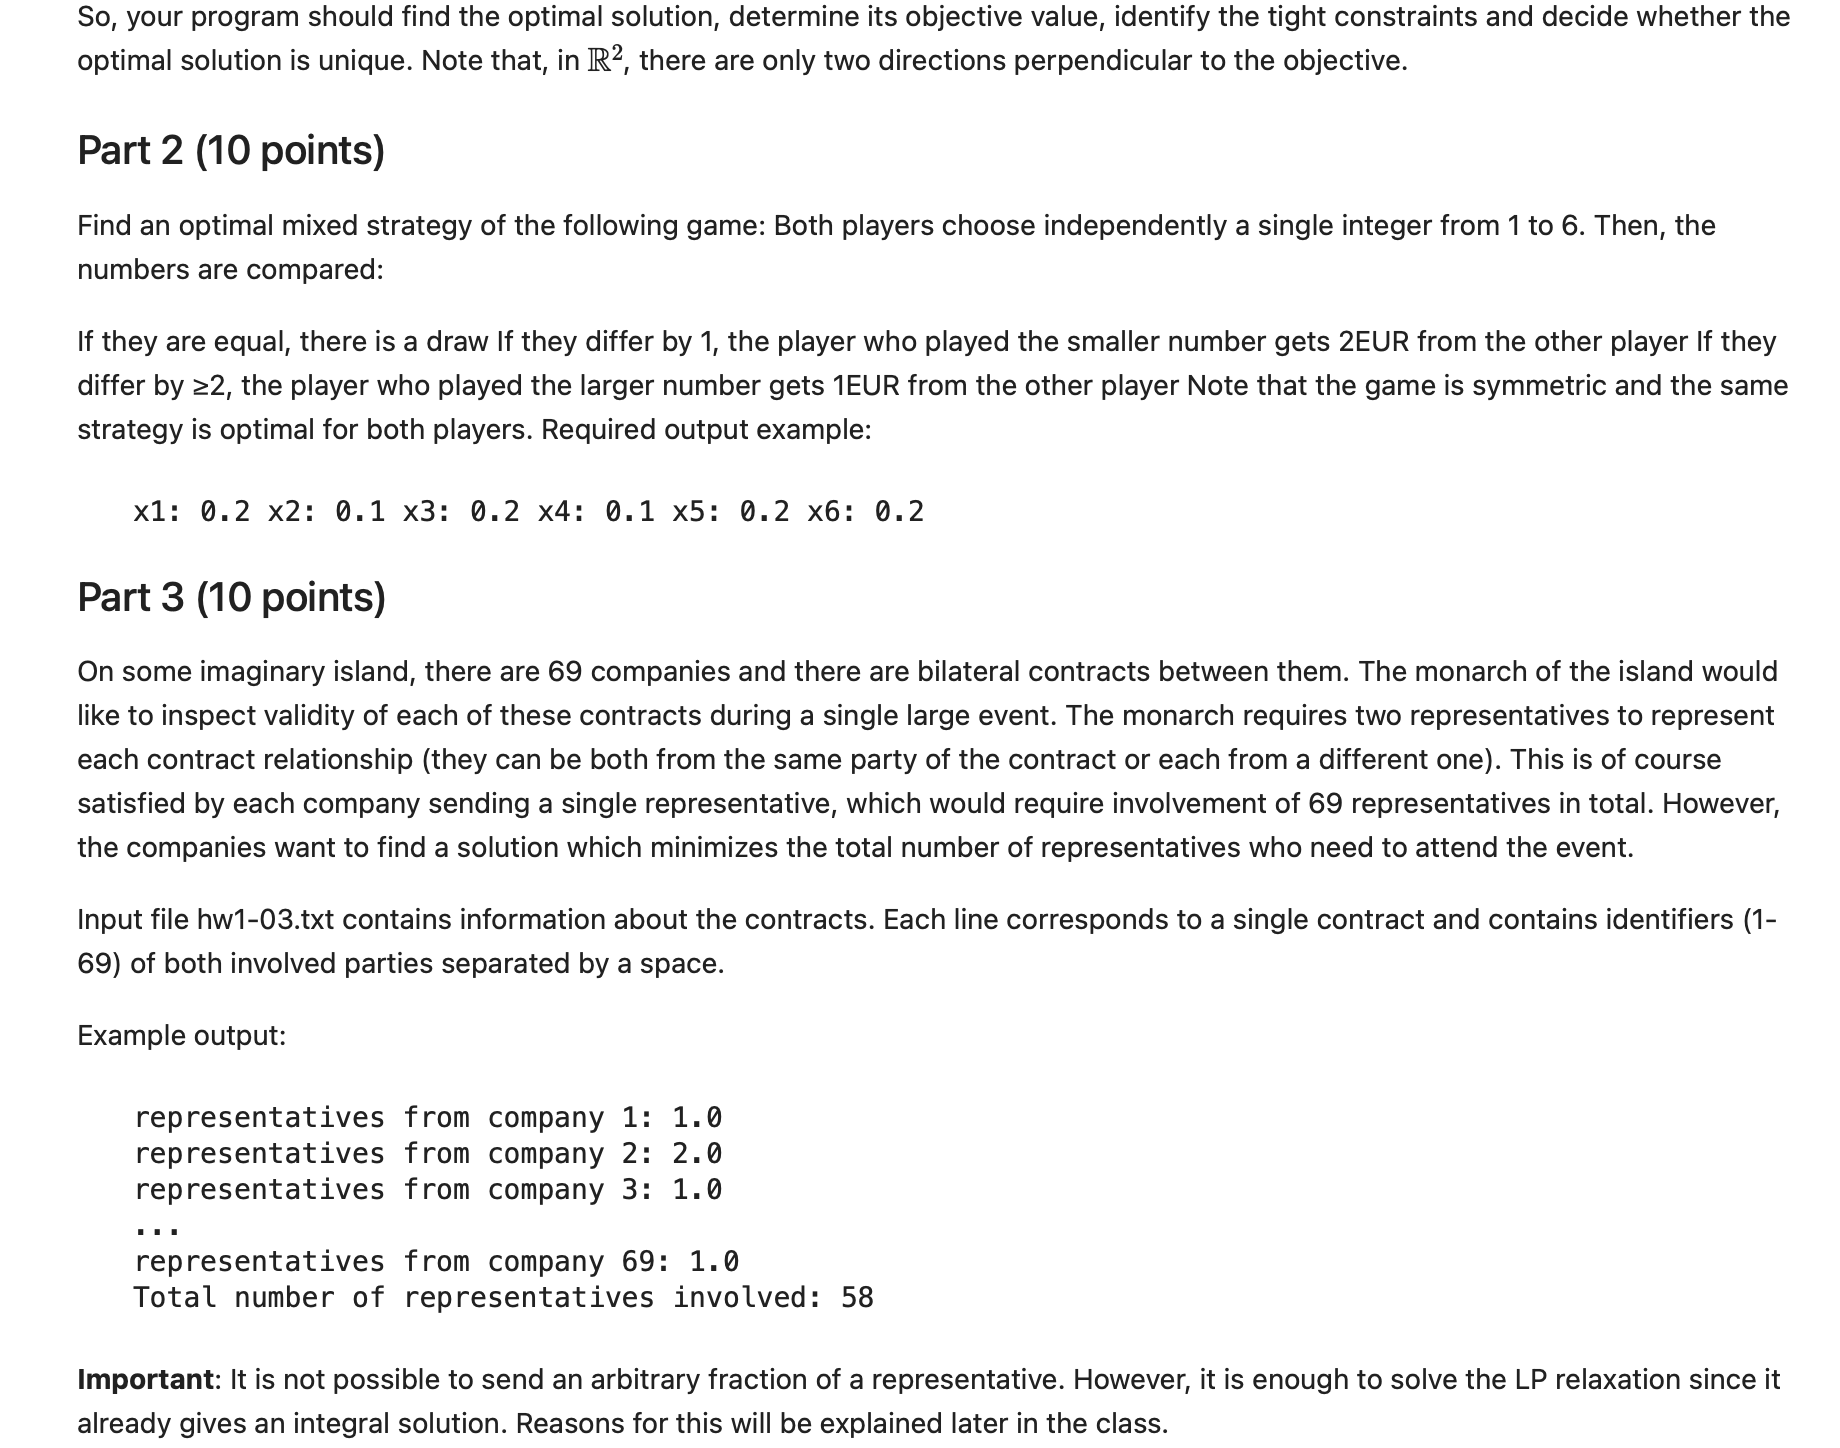

In [21]:
from IPython.display import Image, display

def display_images(image_files):
    for image_file in image_files:
        display(Image(filename=image_file))

image_files = ["./Assign1-1.png", "./Assign1-2.png"]  
display_images(image_files)


#### Solution Part 1

In [22]:
import pulp

problem = pulp.LpProblem('problem',pulp.LpMinimize)

x = pulp.LpVariable('x', lowBound=(-10), cat='Continuous')
y = pulp.LpVariable('y', upBound=(10), cat='Continuous')

problem += 122*x + 143*y 

problem += 3*x + 2*y <= 10
problem += 12*x + 14*y >= -12.5
problem += 2*x + 3*y >=3 
problem += 5*x - 6*y >= -100

solution = problem.solve(pulp.PULP_CBC_CMD(msg=False))

print("The optimal solution:", "x =", x.varValue, "y =", y.varValue)
 
print("Objective value:", pulp.value(problem.objective))

print("Tight constraints:")

if pulp.value(x) == -10: 
    print(1)
    
if pulp.value(y) == 10: 
    print(2)

if 3*pulp.value(x)+2*pulp.value(y) == 10:
    print(3)

if 12*pulp.value(x)+14*pulp.value(y) == -12.5:
    print(4)

if 2*pulp.value(x)+3*pulp.value(y) == 3:
    print(5)

if 5*pulp.value(x)-6*pulp.value(y) == -100:
    print(6)
    

The optimal solution: x = -9.9375 y = 7.625
Objective value: -122.0
Tight constraints:
4
5


#### Solution Part 2

In [23]:

import pulp

x0 = pulp.LpVariable('x0', lowBound=(0), cat='Continuous')
x1 = pulp.LpVariable('x1', lowBound=(0), cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=(0), cat='Continuous')
x3 = pulp.LpVariable('x3', lowBound=(0), cat='Continuous')
x4 = pulp.LpVariable('x4', lowBound=(0), cat='Continuous')
x5 = pulp.LpVariable('x5', lowBound=(0), cat='Continuous')
x6 = pulp.LpVariable('x6', lowBound=(0), cat='Continuous')

x = [x1, x2, x3, x4, x5, x6]

Lp_prob = pulp.LpProblem('Problem', pulp.LpMinimize) 
Lp_prob += x0
Lp_prob += x0 <= 0*x1 - 2*x2 + x3 + x4 + x5 + x6 
Lp_prob += x0 <= 2*x1 + 0*x2 - 2*x3 + x4 + x5 + x6
Lp_prob += x0 <= -x1 + 2*x2 + 0*x3 - 2*x4 + x5 + x6
Lp_prob += x0 <= -x1 -x2 + 2*x3 +0*x4 - 2*x5 + x6
Lp_prob += x0 <= -x1 -x2 -x3 + 2*x4 + 0*x5 - 2*x6
Lp_prob += x0 <= -x1 -x2 -x3 -x4 + 2*x5 + 0*x6


Lp_prob += x1 + x2 + x3 + x4 + x5 + x6 == 1

solution = Lp_prob.solve(pulp.PULP_CBC_CMD(msg=False))

print("The optimal solution:", "x1 =", x1.varValue, "x2 =", x2.varValue, "x3 =", x3.varValue , "x4 =", x4.varValue, "x5 =", x5.varValue, "x6 =", x6.varValue)

The optimal solution: x1 = 0.0 x2 = 0.0625 x3 = 0.3125 x4 = 0.25 x5 = 0.3125 x6 = 0.0625


#### Solution Part 3

In [20]:
import numpy as np
import pulp

M = np.zeros((69, 69))

with open('hw1-03.txt') as f:
   for line in f:
       x, y = map(int, line.split())
       M[x-1][y-1]= 1
       M[y-1][x-1]= 1
       
model = pulp.LpProblem("Minimizing the Number of Representatives", pulp.LpMinimize)

co = [(i, j) for i in range(69) for j in range(69)]

x = pulp.LpVariable.dicts('x', co , lowBound=0, cat='Integer')

model += pulp.lpSum(x)

for i in range(69):
    for j in range(69):
        if M[i,j] == 1:
            model += x[(i,0)] + x[(j,1)] >= 1


model.solve(pulp.PULP_CBC_CMD(msg=False))

print("Total number of representatives involved: ", pulp.value(model.objective))
 
representatives = np.zeros(69)
for i in range(69):
    for j in range(69):
       if x[(i, j)].varValue == 1:
          representatives[i] += 1
          
for i in range(69):
    print("Representatives from company", i+1, ":", representatives[i])


Total number of representatives involved:  61.0
Representatives from company 1 : 1.0
Representatives from company 2 : 1.0
Representatives from company 3 : 1.0
Representatives from company 4 : 2.0
Representatives from company 5 : 1.0
Representatives from company 6 : 1.0
Representatives from company 7 : 1.0
Representatives from company 8 : 1.0
Representatives from company 9 : 1.0
Representatives from company 10 : 1.0
Representatives from company 11 : 1.0
Representatives from company 12 : 1.0
Representatives from company 13 : 1.0
Representatives from company 14 : 0.0
Representatives from company 15 : 1.0
Representatives from company 16 : 1.0
Representatives from company 17 : 1.0
Representatives from company 18 : 1.0
Representatives from company 19 : 1.0
Representatives from company 20 : 1.0
Representatives from company 21 : 1.0
Representatives from company 22 : 1.0
Representatives from company 23 : 1.0
Representatives from company 24 : 0.0
Representatives from company 25 : 1.0
Representat